## Import Libraries

In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Our Goal: to predict the price given a set of attributes.

## Load the Data

In [2]:
from sklearn import datasets
boston = datasets.load_boston()

In [3]:
X_boston,y_boston = boston.data, boston.target
print('Shape of data:', X_boston.shape, y_boston.shape)

Shape of data: (506, 13) (506,)


In [4]:
print('Keys:', boston.keys())
print('Feature names:',boston.feature_names)

Keys: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
Feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## EDA (Exploratory Data Analysis)

## Q1: Create a dataframe and Save that dataset inside it.

In [13]:
df_boston  = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])

df_boston['Price'] = boston['target']


## Q2: Print the head rows of the dataframe.

In [14]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Q3: Use histogram to show the distribution of House Prices.

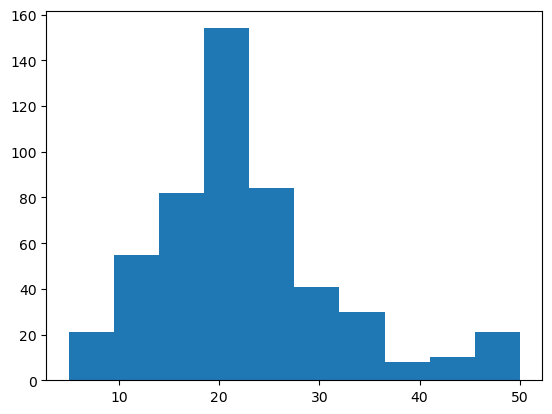

In [15]:
plt.hist(data = df_boston , x = 'Price')
plt.show()

## Q4: Use a heatmap to show the correlation between features and the target labels.

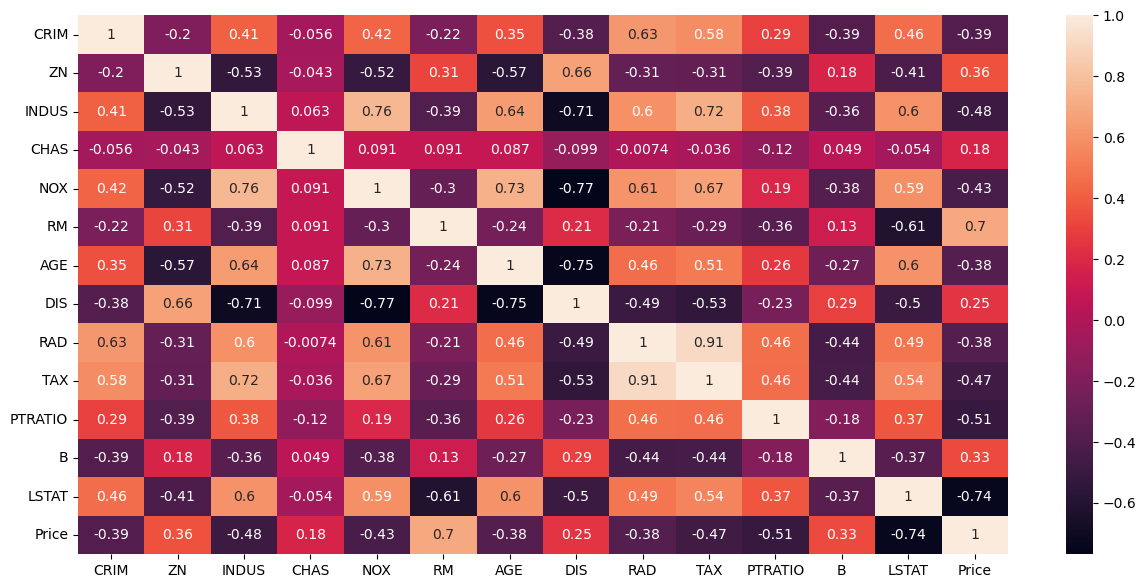

In [29]:
plt.figure(figsize=(15 , 7))
sns.heatmap(data = df_boston.corr() , annot=True  )
plt.yticks(rotation = 0)
plt.show()

## Q5: Use a lmplot to draw the relations between price and LSTAT.

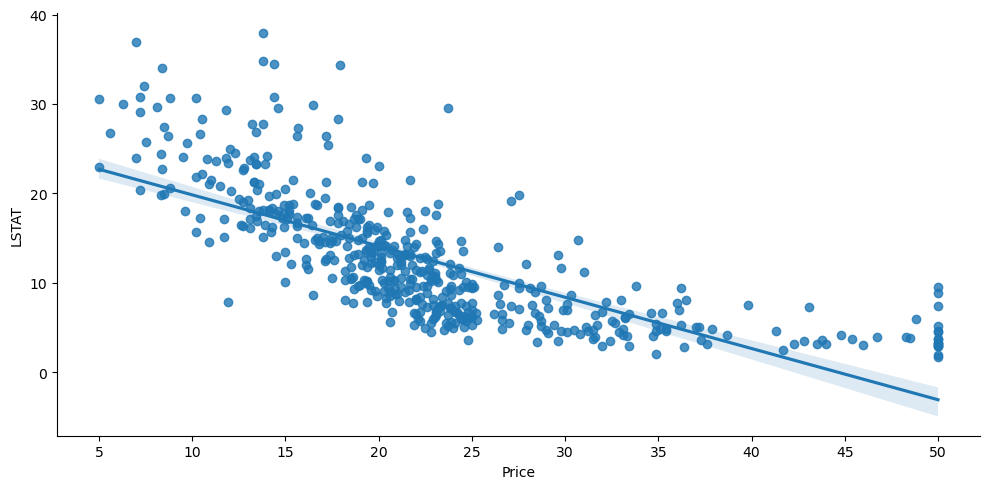

In [76]:
sns.lmplot(data = df_boston , x = 'Price' , y= "LSTAT" , aspect=2 )
plt.xticks(range(5 , 51 , 5))
plt.show()

## Q6: Use a lmplot to draw the relations between price and RM.

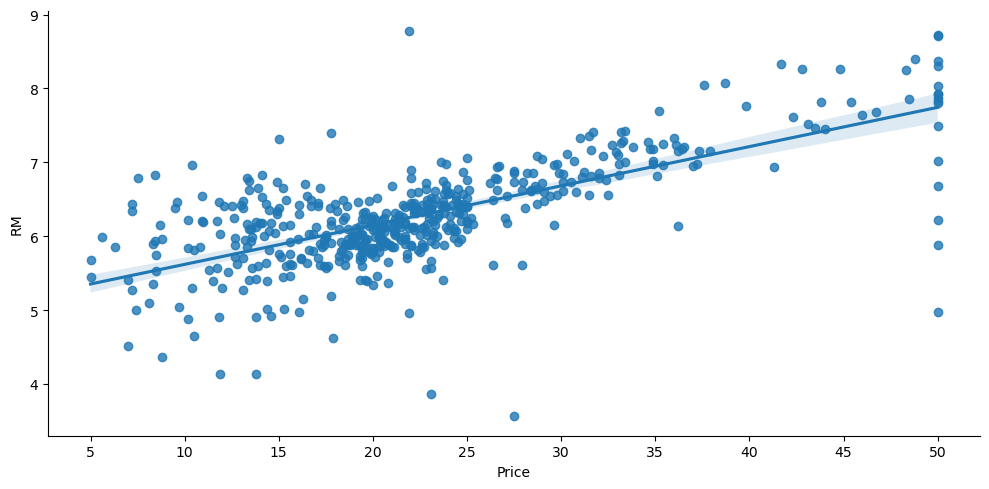

In [77]:
sns.lmplot(data = df_boston , x = 'Price' , y= "RM" , aspect=2 ,  )
plt.xticks(range(5 , 51 , 5))
plt.show()

In [13]:
df_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

## Q7: Split the dataset into Train and Test sets with test_size=30% and random_state=23.

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X = df_boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = df_boston['Price']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

## Q8: Build a Linear Regression Model.

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
lm = LinearRegression()

## Q9: Train the Model.

In [86]:
lm.fit(X_train , y_train)

LinearRegression()

## Q10: Evaluate the model. 
- print intercept and coefficients.
- compare between predictions and real values, then visualize them.
- Draw Residual Histogram.

In [87]:
print(lm.intercept_)

27.78960670325093


In [91]:
coef = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coef

,Coefficient
CRIM,-0.093418
ZN,0.043303
INDUS,-0.022522
CHAS,3.342047
NOX,-16.330196
RM,4.271930
AGE,0.000721
DIS,-1.403231
RAD,0.255429
TAX,-0.007482


In [98]:
predicted = lm.predict(X_test)
predicted

array([25.48882634, 26.85383326, 26.50113697, 16.8311552 , 38.90548232,
       15.92640789, 19.23152198, 29.28806615, 33.79428877, 38.25894258,
       16.19079976, 27.79685578, 25.35181876, 25.61234607, 21.35214307,
       19.1221877 , 31.34939126, 31.18316962, 29.08034579, 28.90724661,
       19.59636559, 17.90783181, 24.98877865, 24.00154542, 13.56628155,
       22.08791583, 32.99232593, 28.36965015, 29.65108026, 39.94060342,
       18.66689308, 14.92285788, 19.6923896 , 19.20029267, 20.14718966,
       37.91700834, 24.21072339, 30.86942899, 13.24009483, 36.42525089,
        8.97985188, 13.88836303, 11.78208526, 19.61208754, 36.32061974,
       20.01573887, 11.5591671 , 21.66102362, 13.54102458, 39.34825195,
       22.51984897,  2.71613802, 17.75797283, 18.44448789, 24.04115464,
       32.92544769,  5.97982079, 21.7327963 , 17.46853879, 22.60218768,
       17.64957037, 21.74406196, 21.65178897, 43.91766166, 30.82382874,
       29.34034013, 21.19730767, 16.86447485, 31.17198257, 13.38

In [99]:
np.array(y_test)

array([23.2, 22.1, 20.6, 17.8, 41.7, 17.2, 20.5, 31.2, 32. , 37.6, 13.3,
       24.5, 19.4, 23.8, 21. , 15.6, 37. , 23.6, 23.6, 22.8, 19.9, 23.2,
       24.6, 23.4, 17.2, 26.4, 37.2, 24.4, 25. , 21.9, 12.7, 14.1, 27.5,
       18.8, 27.9, 48.3, 25. , 32.5, 13.5, 36. , 17.8, 11.3, 15.6, 18.2,
       50. , 20. , 13.1, 19.3, 10.5, 43.5, 20.6,  8.8, 18.1, 14.2, 19.2,
       27.5,  7.4, 19.3, 22.5, 21.4, 19.6, 20.7, 24.1, 50. , 25.1, 24.1,
       13.1,  8.5, 24.8, 11. , 17.7, 13.8, 19.8, 16.1, 17.3, 13.3, 10.4,
       19.4, 12.3, 27.9, 23.1, 18.5, 30.1, 16.3, 25. , 19. , 33.2, 50. ,
       24.3, 13.4, 20.2, 18.3, 16.7, 18.5, 21.9, 14. , 50. , 18.6, 22. ,
       23.8, 13.9, 19.8, 29.4, 50. , 16. , 20.4, 29.8, 24.7, 13.3, 12.1,
       23. , 12.5, 30.7, 22.2, 29.6, 24.8, 12.7, 19.6, 21.6, 21.7, 22.5,
       19.9, 18.4, 27.5, 23.1, 15. , 18.4, 18.8, 22. ,  7.2, 24.6, 20.9,
       17.9, 19.7, 16.1, 20.8, 23.8, 16.6, 21.7, 50. , 15.6, 29.9, 33.3,
       10.5, 16.5, 31.7, 34.7, 28.1, 13.8,  8.7, 35

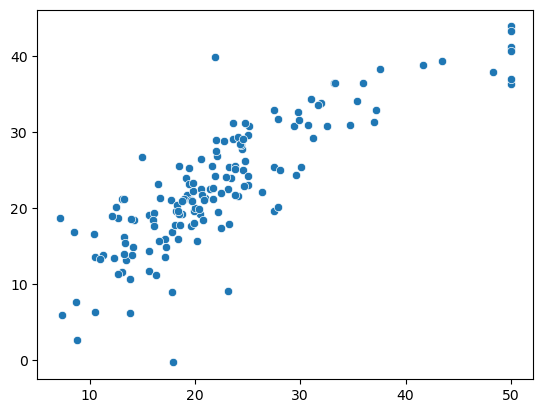

In [112]:
sns.scatterplot(x = np.array(y_test) , y = predicted)
plt.show()

## Residual Histogram

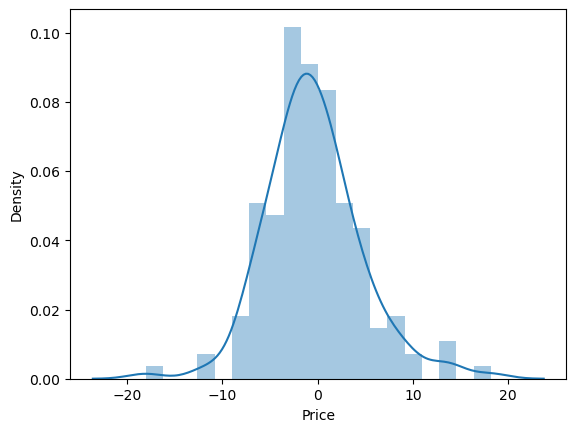

In [111]:
sns.distplot((y_test-predicted) , bins=20)
plt.show()

## Q11: Use evaluation metrics MAE, MSE, RMSE and R^2.

In [107]:
from sklearn import metrics

In [108]:
print('MAE:', metrics.mean_absolute_error(y_test, predicted))
print('MSE:', metrics.mean_squared_error(y_test, predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

MAE: 3.7824295112050246
MSE: 25.358577194006976
RMSE: 5.035730055712575


In [110]:
print('R^2:', metrics.r2_score(y_test, predicted))

R^2: 0.6947991644651349
